In [1]:
# prompt: read excel file

!pip install openpyxl

import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('/content/Patient footfall.xlsx')

# Now you can work with the data in the DataFrame 'df'
print(df.head())

    District  Institute ID                  Institute  Total Patients in IPD  \
0  BAGALKOTE             1     TALUK HOSPITAL, BILAGI                   6346   
1  BAGALKOTE             2  TALUK HOSPITAL, JAMKHANDI                   8819   
2    BALLARI             3                   CHC MOKA                   7734   
3    BALLARI             4             CHC RUPANAGUDI                   4874   
4   BELAGAVI             5              MHU HANDIGUND                   4618   

   Population within 10km  Total Male Population  Total Male Population.1  
0                   40002           16175.565183             23826.434817  
1                   28000           25235.872286              2764.127714  
2                   14000           11412.825159              2587.174841  
3                   18000           12312.214623              5687.785377  
4                   19000           17311.872639              1688.127361  


In [7]:
import pandas as pd

# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('/content/Patient footfall.xlsx')


In [8]:
# prompt: print column names of the data

df.columns

Index(['District', 'Institute ID', 'Institute', 'Total Patients in IPD',
       'Population within 10km', 'Total Male Population',
       'Total Male Population.1'],
      dtype='object')

In [9]:
# prompt: check datatype of each column

df.dtypes


,0
District,object
Institute ID,int64
Institute,object
Total Patients in IPD,int64
Population within 10km,int64
Total Male Population,float64
Total Male Population.1,float64


In [10]:
# prompt: obtain numbers of rows and columns in the data

rows = len(df)
cols = len(df.columns)
print("Number of rows:", rows)
print("Number of columns:", cols)


Number of rows: 8
Number of columns: 7


In [11]:
# prompt: fetch 5th and 3th column data

# Assuming your columns are zero-indexed
fifth_column_data = df.iloc[:, 4]  # 5th column (index 4)
third_column_data = df.iloc[:, 2]   # 3rd column (index 2)

print("Fifth Column Data:\n", fifth_column_data)
print("\nThird Column Data:\n", third_column_data)

Fifth Column Data:
 0    40002
1    28000
2    14000
3    18000
4    19000
5    12000
6    10000
7    11000
Name: Population within 10km, dtype: int64

Third Column Data:
 0       TALUK HOSPITAL, BILAGI
1    TALUK HOSPITAL, JAMKHANDI
2                     CHC MOKA
3               CHC RUPANAGUDI
4                MHU HANDIGUND
5                 MTW BORGAONV
6                   PHC AVATHI
7          PHC  BYLANARASAPURA
Name: Institute, dtype: object


In [12]:
# prompt: filter the data of 1st and 4th column

import pandas as pd

# Assuming your columns are zero-indexed
first_column_data = df.iloc[:, 0]  # 1st column (index 0)
fourth_column_data = df.iloc[:, 3]  # 4th column (index 3)

print("\nFirst Column Data:\n", first_column_data)
print("\nFourth Column Data:\n", fourth_column_data)


First Column Data:
 0            BAGALKOTE
1            BAGALKOTE
2              BALLARI
3              BALLARI
4             BELAGAVI
5             BELAGAVI
6    BENGALURU (RURAL)
7    BENGALURU (RURAL)
Name: District, dtype: object

Fourth Column Data:
 0    6346
1    8819
2    7734
3    4874
4    4618
5    6863
6    4505
7    2805
Name: Total Patients in IPD, dtype: int64


In [18]:
# prompt: filter the data of Bagalkot district having population ,

import pandas as pd

# Assuming your Excel file is named 'Patient footfall.xlsx' and located in the same directory
# Replace with the correct path if it's different
file_path = '/content/Patient footfall.xlsx'

try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
    exit()  # Exit the script if the file is not found

# Assuming the district name is in a column named 'District' and population is in a column named 'Population'
# Replace 'District' and 'Population' with your actual column names if they are different

# Filter data for Bagalkot district
bagalkot_data = df[df['District'] == 'Bagalkot']

# Check if any rows match the criteria
if not bagalkot_data.empty:
    # Filter rows where the 'Population' column is not NaN
    bagalkot_data_with_population = bagalkot_data.dropna(subset=['Population'])

    if not bagalkot_data_with_population.empty:
      print(bagalkot_data_with_population)
    else:
        print("No data found for Bagalkot with population information")
else:
    print("No data found for Bagalkot district")

No data found for Bagalkot district


In [19]:
# prompt: obtain the unique values in Institute ID column

unique_institute_ids = df['Institute ID'].unique()
unique_institute_ids

array([1, 2, 3, 4, 5, 6, 7, 8])

In [20]:
# prompt: obtain the count of institutes in each district

# Assuming 'District' column exists in your DataFrame
institute_counts = df.groupby('District')['Institute ID'].count()
institute_counts

,Institute ID
District,
BAGALKOTE,2
BALLARI,2
BELAGAVI,2
BENGALURU (RURAL),2


In [21]:
# prompt: get the maximum, minimum and mean value of the "total patients in IPD" using groupby() function

# Assuming 'District' is the column you want to group by and 'Total Patients in IPD' is the column with the values
# Replace with your actual column names if different

# Group data by 'District' and get the maximum, minimum, and mean of 'Total Patients in IPD'
ipd_stats = df.groupby('District')['Total Patients in IPD'].agg(['max', 'min', 'mean'])

ipd_stats

,max,min,mean
District,,,
BAGALKOTE,8819,6346,7582.5
BALLARI,7734,4874,6304.0
BELAGAVI,6863,4618,5740.5
BENGALURU (RURAL),4505,2805,3655.0


In [23]:
# prompt: check the null values in the dataset

# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print("\nNull Value Counts:\n", null_counts)

# Check for null values in specific columns (example: 'District', 'Population')
print("\nNull values in 'District' column:", df['District'].isnull().sum())


Null Value Counts:
 District                   0
Institute ID               0
Institute                  0
Total Patients in IPD      0
Population within 10km     0
Total Male Population      0
Total Male Population.1    0
dtype: int64

Null values in 'District' column: 0


In [24]:
# prompt: check for outliers in the dataset

import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df' and you want to check for outliers in 'Total Patients in IPD'
# Replace 'Total Patients in IPD' with the actual column name if different

# Calculate the IQR
Q1 = df['Total Patients in IPD'].quantile(0.25)
Q3 = df['Total Patients in IPD'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Total Patients in IPD'] < lower_bound) | (df['Total Patients in IPD'] > upper_bound)]

# Print or process the outliers
print("Outliers in 'Total Patients in IPD':\n", outliers)


#You can also use Z-score method
# Calculate the Z-scores
from scipy import stats
df['zscore'] = np.abs(stats.zscore(df['Total Patients in IPD']))

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3
outliers_zscore = df[df['zscore'] > threshold]

print("\nOutliers based on Z-score:\n", outliers_zscore)

Outliers in 'Total Patients in IPD':
 Empty DataFrame
Columns: [District, Institute ID, Institute, Total Patients in IPD, Population within 10km, Total Male Population, Total Male Population.1]
Index: []

Outliers based on Z-score:
 Empty DataFrame
Columns: [District, Institute ID, Institute, Total Patients in IPD, Population within 10km, Total Male Population, Total Male Population.1, zscore]
Index: []


In [25]:
# prompt: drop if the dta has any duplicates in institute column

import pandas as pd
import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'
# Drop duplicate rows based on the 'Institute' column, keeping the first occurrence
df = df.drop_duplicates(subset=['Institute'], keep='first')

In [26]:
# prompt: sort the data based on "total patients in IPD" column

# Sort the DataFrame by the 'Total Patients in IPD' column in descending order
df_sorted = df.sort_values(by='Total Patients in IPD', ascending=False)

df_sorted

,District,Institute ID,Institute,Total Patients in IPD,Population within 10km,Total Male Population,Total Male Population.1,zscore
1,BAGALKOTE,2,"TALUK HOSPITAL, JAMKHANDI",8819,28000,25235.872286,2764.127714,1.626731
2,BALLARI,3,CHC MOKA,7734,14000,11412.825159,2587.174841,1.038102
5,BELAGAVI,6,MTW BORGAONV,6863,12000,5560.127521,6439.872479,0.565572
0,BAGALKOTE,1,"TALUK HOSPITAL, BILAGI",6346,40002,16175.565183,23826.434817,0.285092
3,BALLARI,4,CHC RUPANAGUDI,4874,18000,12312.214623,5687.785377,0.513490
4,BELAGAVI,5,MHU HANDIGUND,4618,19000,17311.872639,1688.127361,0.652374
6,BENGALURU (RURAL),7,PHC AVATHI,4505,10000,2419.950748,7580.049252,0.713678
7,BENGALURU (RURAL),8,PHC BYLANARASAPURA,2805,11000,8841.950930,2158.049070,1.635953


In [27]:
# prompt: write a function to check if the ration of IPD/ population is greater/ lesser based on if the ratio is greater or lesser than 0.3

def check_ratio(ipd, population):
  """Checks if the ratio of IPD to population is greater or less than 0.3.

  Args:
    ipd: The number of IPD cases.
    population: The total population.

  Returns:
    A string indicating whether the ratio is greater or less than 0.3,
    or an error message if the population is zero.
  """
  if population == 0:
    return "Error: Population cannot be zero."
  ratio = ipd / population
  if ratio > 0.3:
    return "The ratio of IPD to population is greater than 0.3."
  else:
    return "The ratio of IPD to population is less than or equal to 0.3."

In [38]:
# prompt: use lambda function to obtain IPD per 10k populationw

# Assuming 'Total Patients in IPD' and 'Population' columns exist in your DataFrame
df['IPD_per_10k'] = df.apply(lambda row: (row['Total Patients in IPD'] / row['Population within 10km']) * 10000 if row['Population within 10km'] != 0 else 0, axis=1)

In [29]:
# prompt: replace the district with lower case using map function

# Assuming 'District' is the column you want to modify
df['District'] = df['District'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [30]:
# prompt: rename the column of "Institute ID" to "Institute_ID"

df = df.rename(columns={"Institute ID": "Institute_ID"})

In [35]:
# prompt: merge the data in "Footfall Data" sheet with data in 'District Division' sheet based on "District" column

# Assuming 'Footfall Data' and 'District Division' are sheet names in your Excel file
# and 'District' is the common column for merging

footfall_data = pd.read_excel('/content/Patient footfall.xlsx', sheet_name='Footfall data')
district_division_data = pd.read_excel('/content/Patient footfall.xlsx', sheet_name='District Divison')

# Merge the two DataFrames based on the 'District' column
merged_df = pd.merge(footfall_data, district_division_data, on='District', how='inner')

# Now 'merged_df' contains the combined data
print(merged_df.head())

    District  Institute ID                  Institute  Total Patients in IPD  \
0  BAGALKOTE             1     TALUK HOSPITAL, BILAGI                   6346   
1  BAGALKOTE             2  TALUK HOSPITAL, JAMKHANDI                   8819   
2    BALLARI             3                   CHC MOKA                   7734   
3    BALLARI             4             CHC RUPANAGUDI                   4874   
4   BELAGAVI             5              MHU HANDIGUND                   4618   

   Population within 10km  Total Male Population  Total Male Population.1  \
0                   40002           16175.565183             23826.434817   
1                   28000           25235.872286              2764.127714   
2                   14000           11412.825159              2587.174841   
3                   18000           12312.214623              5687.785377   
4                   19000           17311.872639              1688.127361   

   Division  
0   Belgavi  
1   Belgavi  
2  Kalburgi  


In [36]:
# prompt: perform data standardization and normalization of population within 10km  column

# Assuming 'Population within 10km' is the column you want to standardize and normalize

# Standardization (Z-score normalization)
df['Population_within_10km_standardized'] = (df['Population within 10km'] - df['Population within 10km'].mean()) / df['Population within 10km'].std()

#Normalization (Min-Max scaling)
df['Population_within_10km_normalized'] = (df['Population within 10km'] - df['Population within 10km'].min()) / (df['Population within 10km'].max() - df['Population within 10km'].min())

print(df[['Population within 10km', 'Population_within_10km_standardized', 'Population_within_10km_normalized']].head())

   Population within 10km  Population_within_10km_standardized  \
0                   40002                             2.039755   
1                   28000                             0.874084   
2                   14000                            -0.485640   
3                   18000                            -0.097147   
4                   19000                            -0.000024   

   Population_within_10km_normalized  
0                           1.000000  
1                           0.599960  
2                           0.133324  
3                           0.266649  
4                           0.299980  


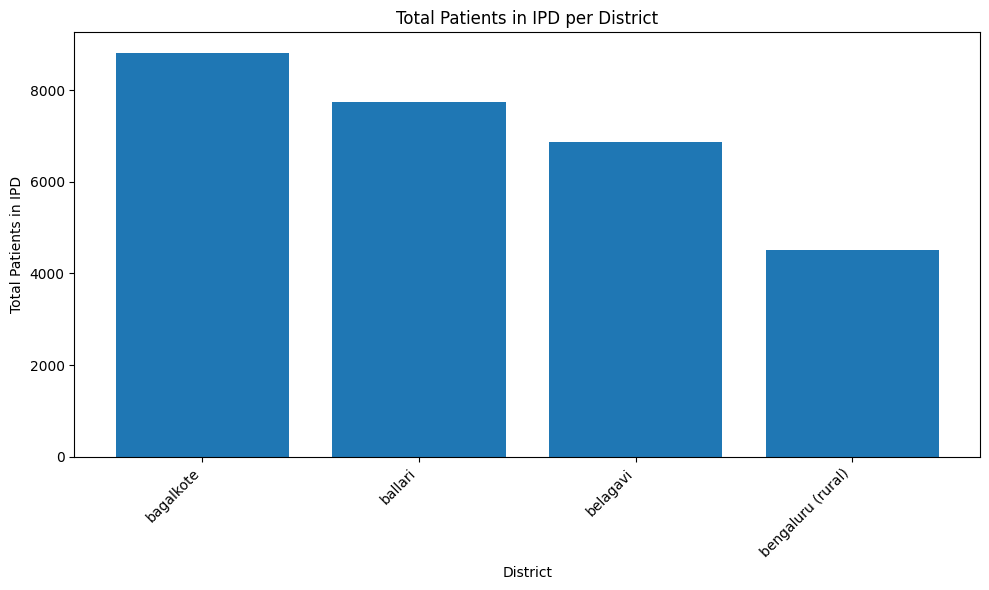

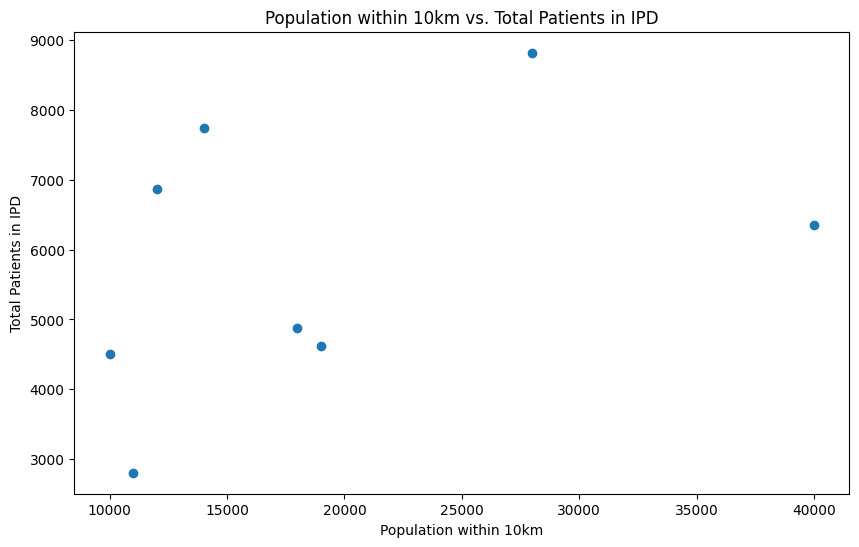

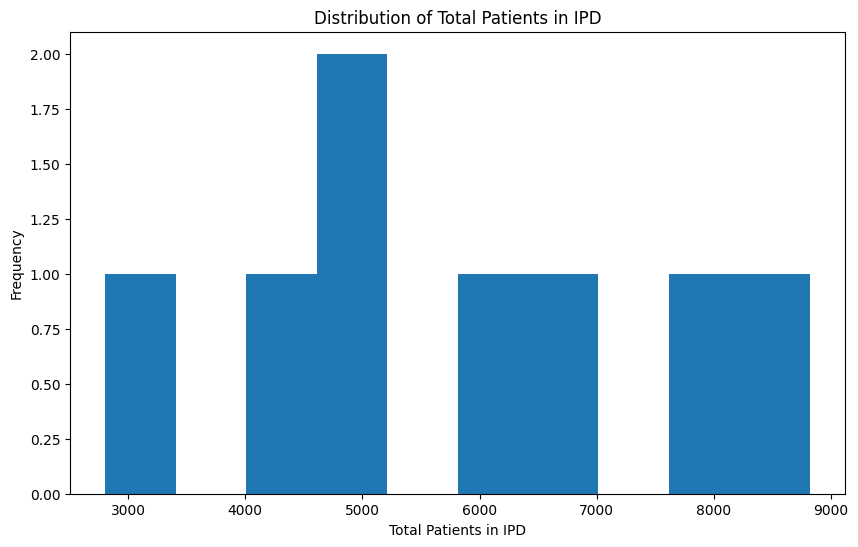

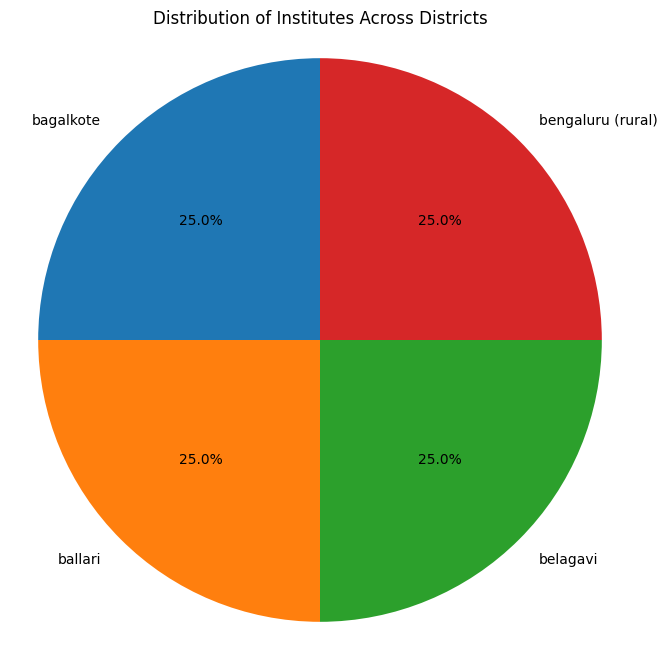

In [37]:
# prompt: plot the bar chart, scatter plot, histogram, pie chart based on the following data

import matplotlib.pyplot as plt

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['District'], df['Total Patients in IPD'])
plt.xlabel('District')
plt.ylabel('Total Patients in IPD')
plt.title('Total Patients in IPD per District')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Population within 10km'], df['Total Patients in IPD'])
plt.xlabel('Population within 10km')
plt.ylabel('Total Patients in IPD')
plt.title('Population within 10km vs. Total Patients in IPD')
plt.show()


# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Total Patients in IPD'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Total Patients in IPD')
plt.ylabel('Frequency')
plt.title('Distribution of Total Patients in IPD')
plt.show()

# Pie chart (example using 'District' and 'Institute ID' counts)
institute_counts = df.groupby('District')['Institute_ID'].count()
plt.figure(figsize=(8, 8))
plt.pie(institute_counts, labels=institute_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Institutes Across Districts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()